This part is diving into the novel approach to approximate Bessel functions, abundent in cosmology as well as in other areas, through symbolic regression search

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from scipy import special
import sympy

params = {
    'figure.figsize': (8.5, 6.5),
    'font.style': 'normal',
    'axes.labelsize': 25,
    'font.size': 16,
    'legend.fontsize': 11,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 10,
    'xtick.minor.size': 4,
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5,
    'font.family': 'serif',
    'legend.framealpha': 1,  # Set legend alpha to 1
    'legend.borderpad': 0.2,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True
}
plt.rcParams.update(params)

from BesselML import Problem
from BesselML import Solution
from BesselML import Promising_solution
sympy.init_printing()

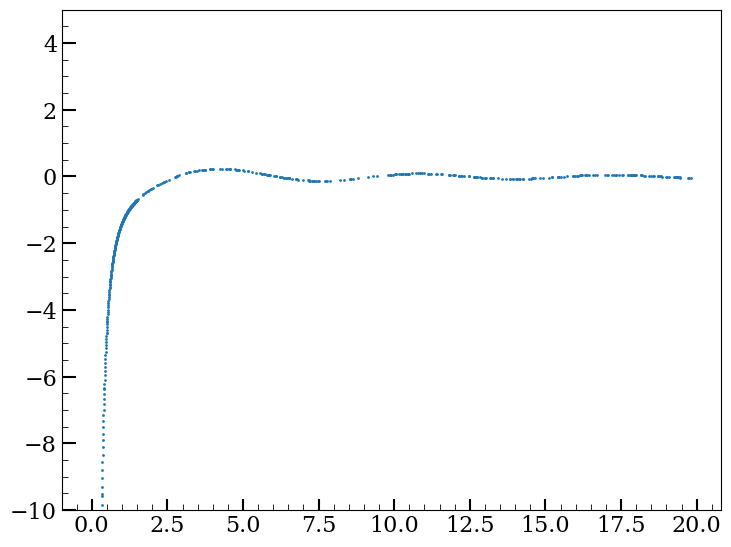

In [2]:
np.random.seed(42) #Keeping the seed for reproducibility


#x_train = np.concatenate(np.sort(np.random.uniform(0, 20, 200)))#, np.linspace(0, 0.5, 500)))
x_train = np.sort(np.concatenate((np.random.uniform(1e-3, 20, 300), np.linspace(1e-3, 1.5, 300))))
# Training data from uniform distribution
x_test = np.sort(np.concatenate((np.random.uniform(1e-3, 20, 300), np.linspace(1e-3, 1.5, 300))))

target_train = special.spherical_yn(1, x_train, derivative=False) 
target_test = special.spherical_yn(1, x_test, derivative=False)

plt.scatter(x_train, target_train, s=1)
plt.ylim(-10, 5)


In [3]:
bessel_sph_0_args = {
    'allowed_symbols': "add,sub,mul,div,constant,variable,sin,cos",
    'epsilon': 1e-5,
    'objectives': ['rmse', 'length'], 
    'max_evaluations': int(1e16),
    'generations': int(1e16),
    'max_length': 50,
    'max_time': 60*3,
    'n_threads': 12,
    'tournament_size':2
}

Bessel_sph_0 = Problem("Bessel spherical of order 0", (x_train, target_train), (x_test, target_test), bessel_sph_0_args)

In [4]:
Bessel_sph_0.solve()

[40776.9609375, 5.0], 498828115968.00, ((-3048.165527343750) + ((-276.387329101562) * ((-0.880757272243) * X1))), 1662760487.64
[40705.84375, 6.0], 497089740800.00, ((-2279.773681640625) + ((-4080.857421875000) * cos(((-3.335192441940) * X1)))), 1656966406.10
[7706.310546875, 7.0], 17816166400.00, (1928.152832031250 + ((-25415.287109375000) * ((-0.172229439020) / ((-4.552046775818) * X1)))), 59387215.27
[2.9691874980926514, 8.0], 3302.64, ((-172100528.000000000000) + (172100528.000000000000 * cos((0.000201433897 / ((-1.867661118507) * X1))))), 8.87
[0.2414436787366867, 9.0], 643.89, ((-0.206426486373) + (4.058705329895 * ((3.274448871613 / (6.283185482025 * X1)) / ((-2.115171670914) * X1)))), 0.06
[0.24144330620765686, 10.0], 647.94, ((-0.206884458661) + (4.551861286163 * ((sin(0.563242793083) / (6.283185482025 * X1)) / ((-0.386806666851) * X1)))), 0.06
[0.07191823422908783, 11.0], 624.80, (0.059014968574 + ((-3.866557836533) * ((cos(cos((0.836992502213 * X1))) / (2.073438167572 * X1))

<Axes: title={'center': 'Bessel spherical of order 0 - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

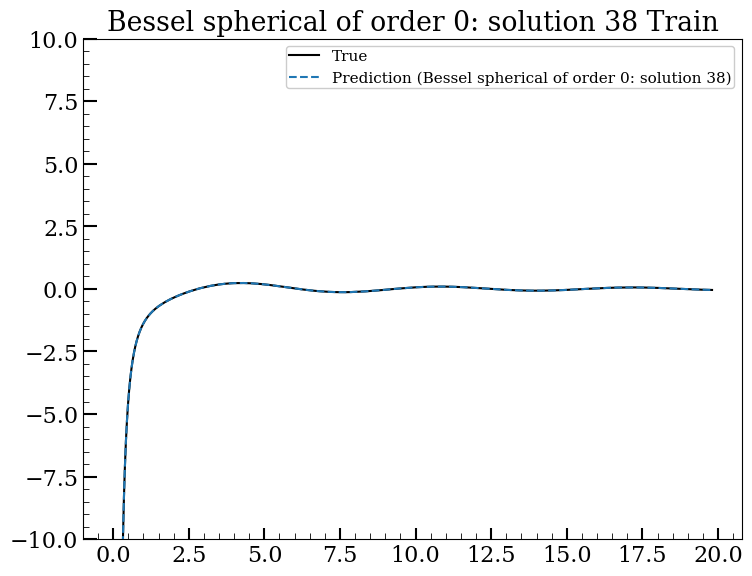

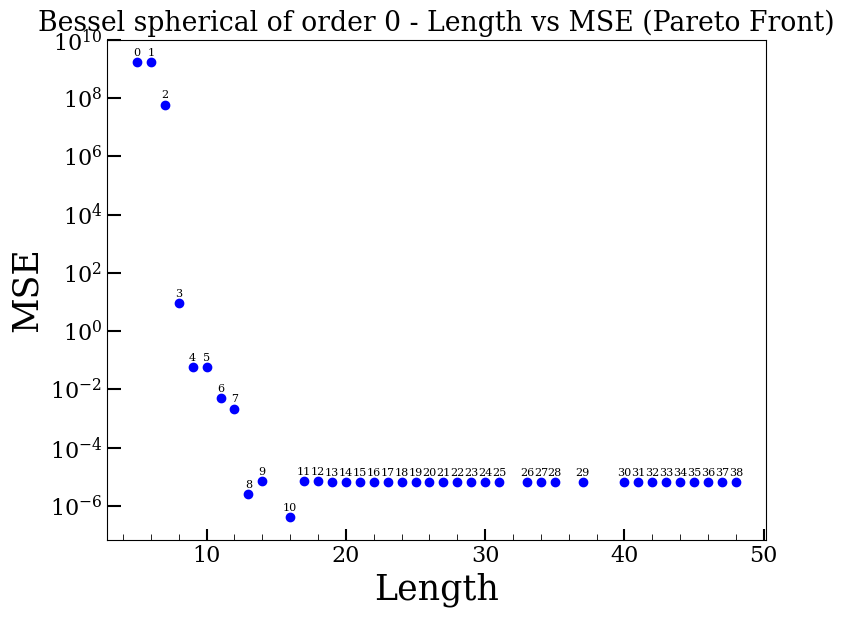

In [5]:
Bessel_sph_0.solutions[-1].plot_results()
plt.ylim(-10, 10)
Bessel_sph_0.plot_l_vs_mse()

In [10]:
Neumann_sph_1 = Bessel_sph_0

k=8
Neumann_sph_1.solutions[k].display_expression()
b_vals = Neumann_sph_1.solutions[k].extract_and_format()[1]
b_vals

<IPython.core.display.Math object>

{'b0': 0.0005833681789999545,
 'b1': 0.8780673237762358,
 'b2': 1.0069051980970016,
 'b3': 1.0000000783040832,
 'b4': 0.8758144974709694}

In [11]:
str(Neumann_sph_1.solutions[k].sympy_expr)

'b0 - b1*sin(X1*b2)/X1 - b3*cos(X1*b4)/X1**2'

In [33]:
manual = '- b1*sin(X1*b2)/X1 - b3*cos(X1*b4)/X1**2'

Manual_limiting_test = Promising_solution(sp.parsing.sympy_parser.parse_expr(manual),  (x_train, target_train), Neumann_sph_1.solutions[k], initial_parameters=Neumann_sph_1.solutions[k].b_vals)
#constraints_man, const_term_man, linear_term_man = Manual_limiting_test.generate_constraints_from_expansion(const_target = 0, linear_target=0)

In [39]:
Final_solution = Manual_limiting_test.int_analysis_and_modification_iterative_optimisation()

  - Found active parameters in expression: ['b1', 'b2', 'b3', 'b4']
  - Baseline Best MSE: 1.316216e-05

--- Starting Iterative Refinement Process ---

  - Cheapest candidate to round is 'b3'.
    - If rounded, new MSE would be 4.318263e-09 (Abs change: -1.315784e-05)
    - Cost is acceptable. Locking in 'b3' as an integer.

  - Cheapest candidate to round is 'b1'.
    - If rounded, new MSE would be 1.235799e-13 (Abs change: -4.318140e-09)
    - Cost is acceptable. Locking in 'b1' as an integer.

  - Cheapest candidate to round is 'b4'.
    - If rounded, new MSE would be 4.098025e-16 (Abs change: -1.231701e-13)
    - Cost is acceptable. Locking in 'b4' as an integer.

  - Cheapest candidate to round is 'b2'.
    - If rounded, new MSE would be 2.226206e-26 (Abs change: -4.098025e-16)
    - Cost is acceptable. Locking in 'b2' as an integer.

  - All parameters have been rounded.

  - Final parameters to be rounded: ['b3', 'b1', 'b4', 'b2']
Creating a new Promising solution: -sin(X1)/X1 -

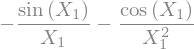

In [40]:
Final_solution.sympy_expr